In [81]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from functools import partial
from multiprocessing import Pool, cpu_count

In [145]:
class MeanShift:
    
    def __init__(self, radius=5, n_iter_limit = 10*6):
        self.radius = radius
        self.centroids = None
        self.optimized = False
        self.n_proceses = cpu_count() - 1
        self.n_iter_limit = n_iter_limit
        
        
    def _centroids_initialization(self, data, kind='all'):
        """
        Centroids initialization
        """
        self.centroids = {}
        if kind == 'all':
            for i in range(len(data)):
                self.centroids[i] = data[i] 
        elif kind == 'random':
            for i in range(len(data)):
                if np.random.rand()<0.4:
                    self.centroids[i] = data[i]
                    
                    
    def _distance(self,x,y):
        """Distance between two vectors.
        Could be cosine for big vector spaces"""
        return np.linalg.norm(x-y)        
        
    def fit(self, data):
        """
        Finding centroids for data
        """
        self._centroids_initialization(data)
        
        while not self.optimized and self.n_iter_limit>0:
            self.n_iter_limit -=1
            new_centroids = []
            for i in self.centroids:
                inside = []
                centroid = self.centroids[i]
                for featureset in data:
                    if self._distance(featureset, centroid) < self.radius:
                        inside.append(featureset)

                new_centroid = np.average(inside, axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))
            prev_centroids = dict(self.centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            self.optimized = True
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    self.optimized = False
                if not self.optimized:
                    break
            self.centroids = centroids
    
    def get_centroids(self,):
        centroids = []
        for k in self.centroids.keys():
            centroids.append(self.centroids[k])
        return np.array(centroids)
                    
        

# MeanShift for G2 dataset:

In [116]:
import pandas as pd
from tqdm.auto import tqdm

# loading datasets
datasets = {}
for i in range(1,11):
    datasets[i*10] = pd.read_csv(f'data/g2-txt/g2-2-{i*10}.txt', sep='     ', names=['x1', 'x2'], engine='python')

# analizing datasets for different variation
cluster_centers = {}
for j in tqdm(range(1,11)):
    model = MeanShift(j*10*3)
    model.fit(datasets[j*10].values)
    cluster_centers[j*10] = model.get_centroids()

In [117]:
# loading datasets ground truth
gt = {}
for i in range(1,11):
    gt[i*10] = pd.read_csv(f'data/g2-gt-txt/g2-2-{10}-gt.txt', sep=' ', names=['x1', 'x2'], engine='python')

# Plotting results:

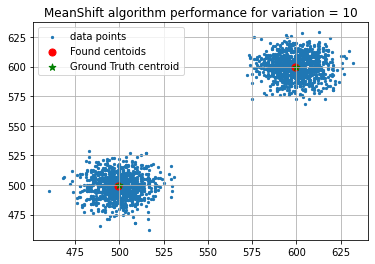

In [118]:
i = 10
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

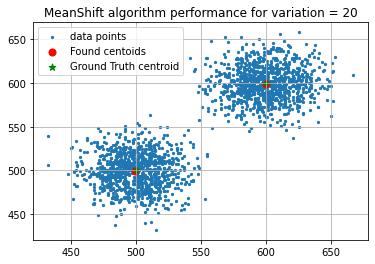

In [119]:
i = 20
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

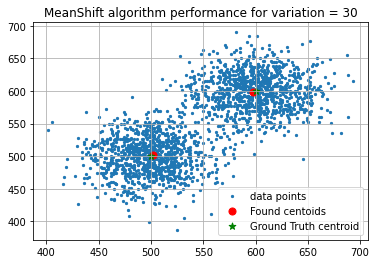

In [120]:
i = 30
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

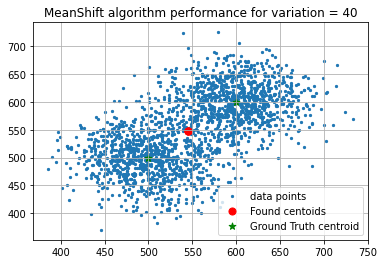

In [121]:
i = 40
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

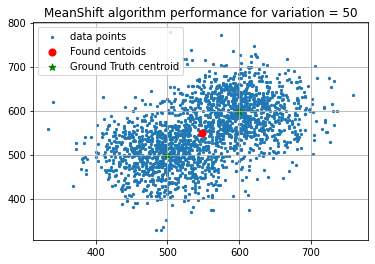

In [122]:
i = 50
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

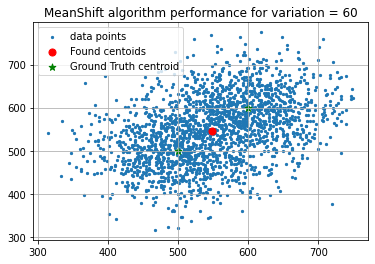

In [123]:
i = 60
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

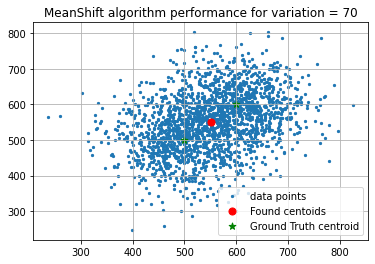

In [124]:
i = 70
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

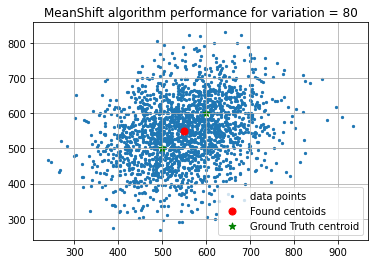

In [125]:
i = 80
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

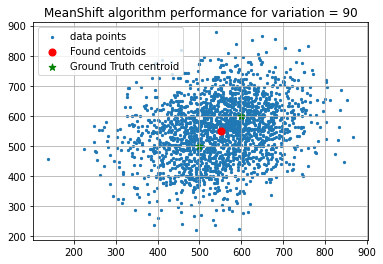

In [126]:
i = 90
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

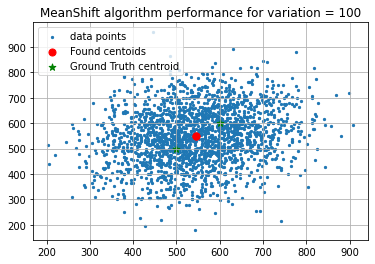

In [127]:
i = 100
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

**Comments:** Як ми бачимо алгоритм гарно працює для добре сепарабельних кластерів, проте, коли ми отримуємо кластери, які сильно перетинаються, алгоритм MeanShift є не коректним. Також алгоритм сильно є залежним від початкової ініціалізації. Потрібно або вгадити оптимальний радіус або ж придумувати якісь модифікації. Загалом алгоритм працює добре, проте коли є сильний перетин (навіть людині складно угледіти два різних кластери) тоді алгоритм помиляється.

# MeanShift for S-sets dataset:

In [146]:
import pandas as pd
from tqdm.auto import tqdm

# loading datasets
datasets = {}
for i in range(1,5):
    datasets[i] = pd.read_csv(f'data/s{i}.txt', sep='    ', names=['x1', 'x2'], engine='python')

# analizing datasets for different variation
cluster_centers = {}
for j in tqdm(range(1,5)):
    model = MeanShift(0.1*10**6)
    model.fit(datasets[j].values)
    cluster_centers[j] = model.get_centroids()

In [169]:
# loading datasets ground truth
gt = {}
for i in range(1,3):
    gt[i] = pd.read_csv(f'data/s-originals/s{i}-cb.txt', sep=' ', names=['1', '2'])
    gt[i]['x1'] = gt[i].index
    gt[i]['x2'] = gt[i]['1']

for i in range(3,5):
    gt[i] = pd.read_csv(f'data/s-originals/s{i}-cb.txt', sep='\t', names=['1', '2'])
    gt[i]['x1'] = gt[i].index
    gt[i]['x2'] = gt[i]['1']

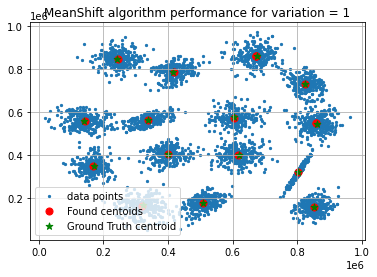

In [170]:
i = 1
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

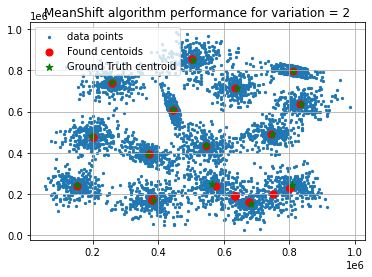

In [171]:
i = 2
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

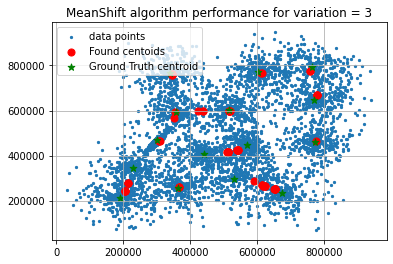

In [172]:
i = 3
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

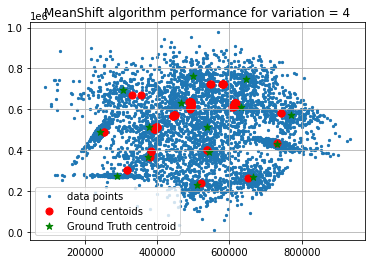

In [173]:
i = 4
plt.scatter(datasets[i]['x1'], datasets[i]['x2'], s=5, label = 'data points')
plt.scatter(cluster_centers[i][:,0], cluster_centers[i][:,1], color='r', s=50, label = 'Found centoids')
plt.scatter(gt[i]['x1'], gt[i]['x2'], color='g', s=50, marker = '*', label = 'Ground Truth centroid')

plt.legend()
plt.grid()
plt.title(f'MeanShift algorithm performance for variation = {i}')
plt.show()

Аналогічно, маємо, що у разі добре сепарабельних кластерів маємо гарні результати. Там де кластери сильно перетинаються - відбуваються неточності.